In [2]:
import pandas as pd
df = pd.read_csv('flight_data_us_2021.csv')

In [3]:
Trans=df[["ORIGIN_STATE_NM","DEST_STATE_NM","MONTH","PASSENGERS"]]

In [4]:
df2 = pd.read_csv("monthly_covid_increase_data_by_state_2021.csv")

In [5]:
df2 = df2[["State","month","Increased_Confirmed","Total_test_in_the_month"]]

In [6]:
df2.rename({"State":"STATE","month":"MONTH"},axis=1,inplace=True)

In [7]:
df2["sigma"] = df2["Increased_Confirmed"]/df2["Total_test_in_the_month"]

In [8]:
pop_by_state=pd.read_csv("population_by_state.csv")

In [9]:
pop_by_state.rename({"US States":"STATE"},axis=1,inplace=True)

In [10]:
Trans.rename({"ORIGIN_STATE_NM":"STATE"},axis=1,inplace=True)

D:\.Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
df2

,STATE,MONTH,Increased_Confirmed,Total_test_in_the_month,sigma
0,New Hampshire,1,20017,229228.0,0.087324
1,New Hampshire,2,9135,191378.0,0.047733
2,New Hampshire,3,8588,175904.0,0.048822
3,New Hampshire,4,10347,198958.0,0.052006
4,New Hampshire,5,3563,137389.0,0.025934
...,...,...,...,...,...
575,Illinois,6,9152,1139832.0,0.008029
576,Illinois,7,27415,1026462.0,0.026708
577,Illinois,8,103331,1952019.0,0.052935
578,Illinois,9,99388,2828101.0,0.035143


In [12]:
df2[["STATE","MONTH","sigma"]]

,STATE,MONTH,sigma
0,New Hampshire,1,0.087324
1,New Hampshire,2,0.047733
2,New Hampshire,3,0.048822
3,New Hampshire,4,0.052006
4,New Hampshire,5,0.025934
...,...,...,...
575,Illinois,6,0.008029
576,Illinois,7,0.026708
577,Illinois,8,0.052935
578,Illinois,9,0.035143


In [13]:
Trans=Trans.merge(df2[["STATE","MONTH","sigma"]],how="left",on=["STATE","MONTH"])
Trans["temp"]=Trans["sigma"]*Trans["PASSENGERS"]

In [14]:
t2=Trans[["DEST_STATE_NM","MONTH","temp"]].groupby(["DEST_STATE_NM","MONTH"]).sum().reset_index()
pop_by_state.rename({"STATE":"DEST_STATE_NM"},axis=1,inplace=True)
t2=t2.merge(pop_by_state,how="left",on=["DEST_STATE_NM"])
t2

,DEST_STATE_NM,MONTH,temp,State Rank,Population 2020,US States by population percentage (2020)
0,Alabama,1,13583.573172,24.0,"5,024,279",1.50%
1,Alabama,2,7842.779545,24.0,"5,024,279",1.50%
2,Alabama,3,20776.569926,24.0,"5,024,279",1.50%
3,Alabama,4,9095.715099,24.0,"5,024,279",1.50%
4,Alabama,5,7765.344997,24.0,"5,024,279",1.50%
...,...,...,...,...,...,...
525,Wyoming,6,2956.772593,51.0,"576,851",0.17%
526,Wyoming,7,6111.922739,51.0,"576,851",0.17%
527,Wyoming,8,8717.337263,51.0,"576,851",0.17%
528,Wyoming,9,6418.698517,51.0,"576,851",0.17%


In [15]:
t2.head()

,DEST_STATE_NM,MONTH,temp,State Rank,Population 2020,US States by population percentage (2020)
0,Alabama,1,13583.573172,24.0,"5,024,279",1.50%
1,Alabama,2,7842.779545,24.0,"5,024,279",1.50%
2,Alabama,3,20776.569926,24.0,"5,024,279",1.50%
3,Alabama,4,9095.715099,24.0,"5,024,279",1.50%
4,Alabama,5,7765.344997,24.0,"5,024,279",1.50%


In [16]:
def remove(x):
    if isinstance(x,float):
        return x
    else:
        return x.replace(",","")
t2["Population"]=pd.to_numeric(t2["Population 2020"].apply(remove))

t2["IIP"]=t2["temp"]/t2["Population"]
t2

,DEST_STATE_NM,MONTH,temp,State Rank,Population 2020,US States by population percentage (2020),Population,IIP
0,Alabama,1,13583.573172,24.0,"5,024,279",1.50%,5024279.0,0.002704
1,Alabama,2,7842.779545,24.0,"5,024,279",1.50%,5024279.0,0.001561
2,Alabama,3,20776.569926,24.0,"5,024,279",1.50%,5024279.0,0.004135
3,Alabama,4,9095.715099,24.0,"5,024,279",1.50%,5024279.0,0.001810
4,Alabama,5,7765.344997,24.0,"5,024,279",1.50%,5024279.0,0.001546
...,...,...,...,...,...,...,...,...
525,Wyoming,6,2956.772593,51.0,"576,851",0.17%,576851.0,0.005126
526,Wyoming,7,6111.922739,51.0,"576,851",0.17%,576851.0,0.010595
527,Wyoming,8,8717.337263,51.0,"576,851",0.17%,576851.0,0.015112
528,Wyoming,9,6418.698517,51.0,"576,851",0.17%,576851.0,0.011127


In [17]:
t2.rename({"DEST_STATE_NM":"STATE"},axis=1,inplace=True)
t2=t2[["STATE","MONTH","IIP"]]

In [18]:
t2.to_csv("IIP_data.csv")

In [19]:
data=pd.read_csv("monthly_covid_increase_data_by_state_2021.csv")

In [20]:
data.rename({"State":"STATE","month":"MONTH"},axis=1,inplace=True)

In [21]:
t2=t2.merge(data,how="left",on=["STATE","MONTH"])
train=t2[["IIP","Increased_Confirmed"]]
train.dropna(axis=0,inplace=True)

D:\.Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
model=LinearRegression()
X=train["IIP"].values
X=np.expand_dims(X,axis=1)
y=train["Increased_Confirmed"].values
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [23]:
model.coef_

array([1515578.82332826])

In [24]:
model.intercept_

34608.0631999788

In [25]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X)


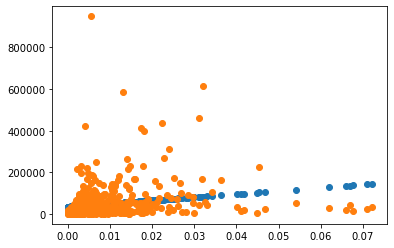

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X,y_pred)
plt.scatter(X,y)

In [29]:
from scipy import stats
import numpy as np

slope, intercept, r_value, p_value, std_err = stats.linregress(train["IIP"].values,y)

In [30]:
p_value

4.331449676062167e-05

In [31]:
r_value

0.18883235746084254

In [32]:
intercept

34608.0631999788

In [33]:
slope

1515578.8233282648

In [34]:
std_err

367085.5323651941

In [37]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(y,train["IIP"].values)
results = model.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.204
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              118.3
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                    1.11e-24
Time:                        11:37:39   Log-Likelihood:                         -5928.5
No. Observations:                 463   AIC:                                  1.186e+04
Df Residuals:                     462   BIC:                                  1.186e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.124e+06   2.87e+05     10.875      0.000    2.56e+06    3.69e+06
==============================================================================
Omnibus:                      465.620   Durbin-Watson:                   1.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24189.718
Skew:                           4.327   Prob(JB):                         0.00
Kurtosis:                      37.337   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""